# Titanic Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing important Libraries

In [2]:
df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Loading the Data into DataFrame

In [3]:
df.shape

(891, 12)

Here we have 891 rows and 12 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can the datatype, Column 'Age' and 'Cabin' are showing missing values

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe the importatnt attribute of data

<AxesSubplot:>

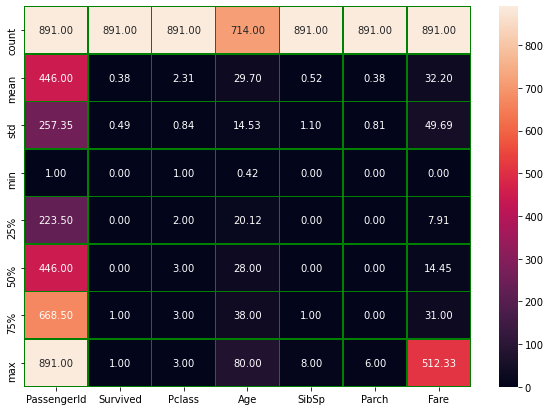

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.2f')

Heatmap describing important attributes. 

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It shows Column 'Age' and 'Cabin' having 177 and 687 missing values respectively.

In [8]:
(df==0).astype(bool).sum(axis=0)

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

It shows number of zero values in columns

In [10]:
df['Fare']=df['Fare'].replace(0,np.nan)
df['Fare']=df.groupby('Pclass',as_index=False)['Fare'].fillna(np.mean(df['Fare']))
(df==0).astype(bool).sum(axis=0)

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Here Since Fare cannot be zero we replace zero value with mean of Fare as per the Passenger Class. 

In [11]:
df['Age']=df.groupby('Sex',as_index=False)['Age'].fillna(np.mean(df['Age']))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Here we fill missing data of Age with mean value Grouped By Sex and checking the value.

In [12]:
df['Embarked'].mode()

0    S
dtype: object

Finding most repeated value in Column 'Embarked'

In [51]:
df['Embarked']=df['Embarked'].fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Here we fill the missing value with the most occuring value

Survived       1.000000
Fare           0.250970
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64


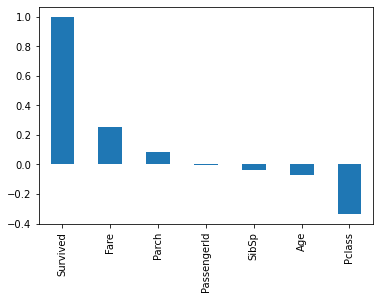

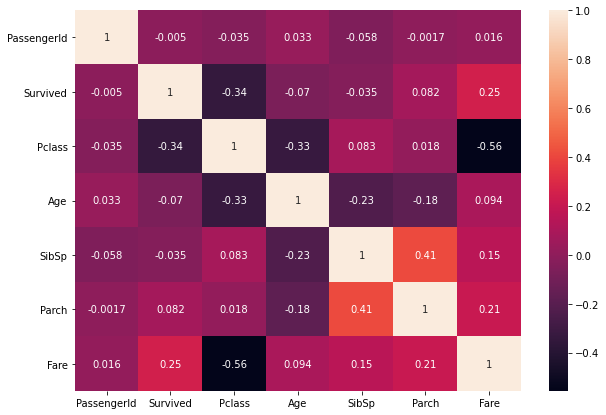

In [52]:
cor=df.corr()['Survived'].sort_values(ascending=False)
print(cor)
cor.plot(kind='bar')
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Here it show the correlation in descending order and bar plot of correlation and Heatmap of correlation. We can see that Sibsp and Parch have high correlation.

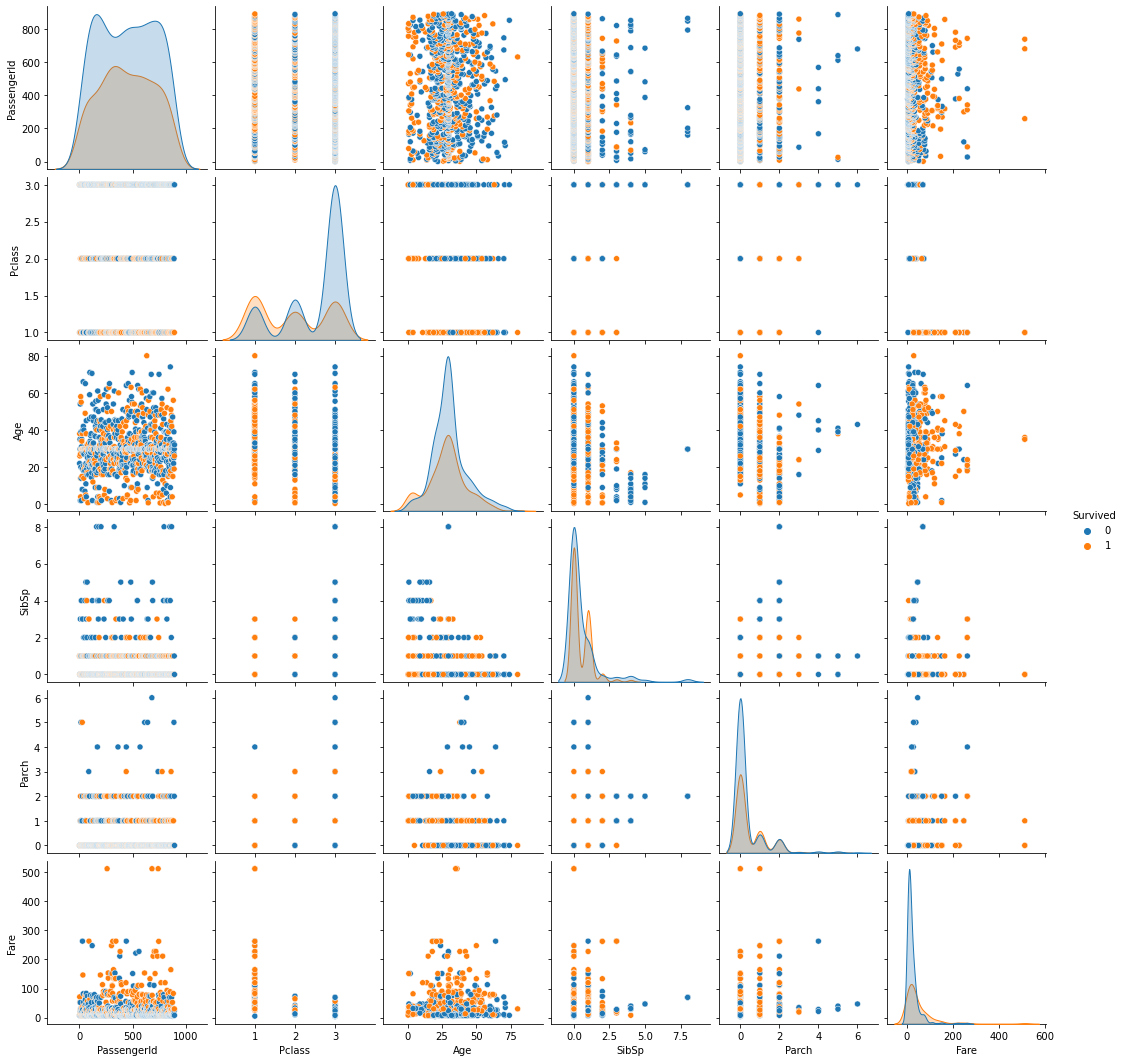

In [53]:
sns.pairplot(df,hue='Survived')

Pair Plot Between Columns according to survivability.

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
7.6292      1
15.0500     1
47.1000     1
8.6833      1
Name: Fare, Length: 248, dtype: int64


<AxesSubplot:xlabel='Fare', ylabel='count'>

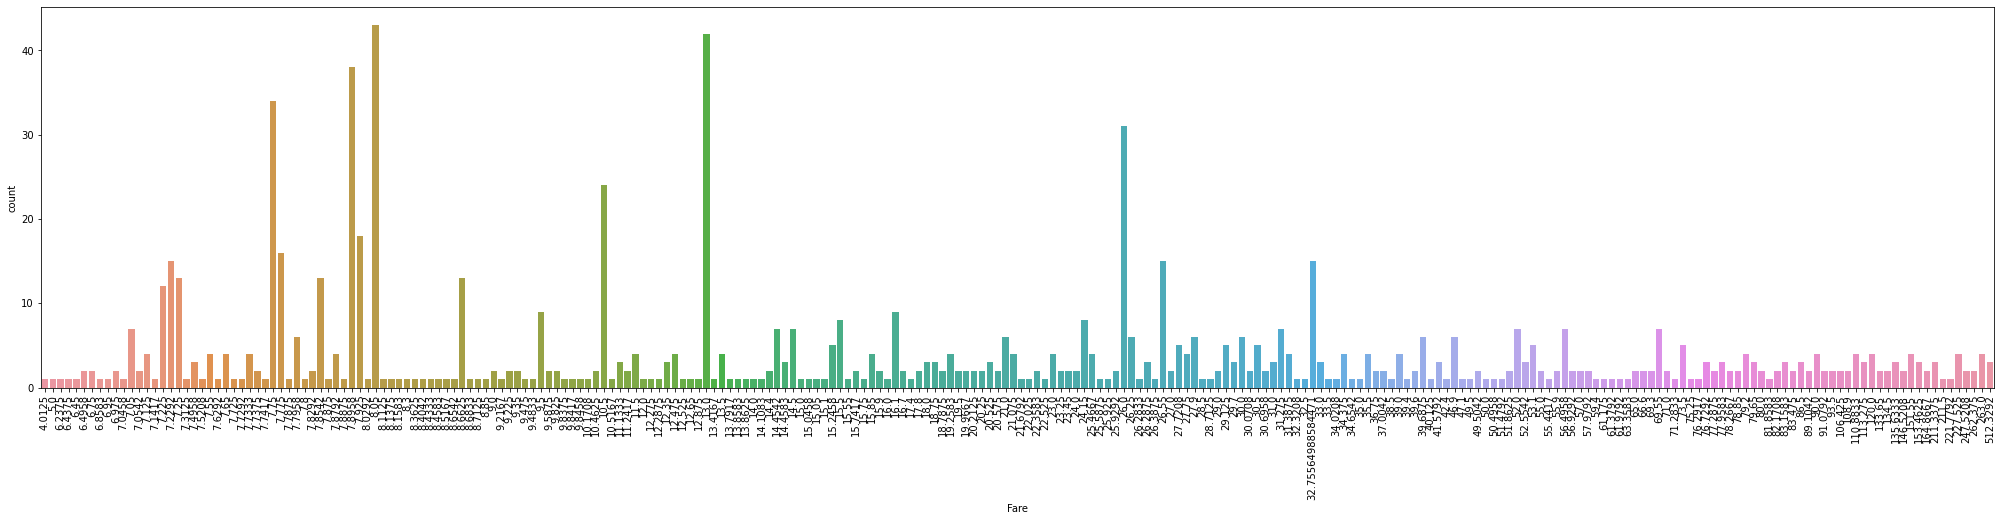

In [54]:
plt.figure(figsize=(35,7))
plt.xticks(rotation=90)
print(df['Fare'].value_counts())
sns.countplot(x='Fare',data=df)

Ploting Count of Fare

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

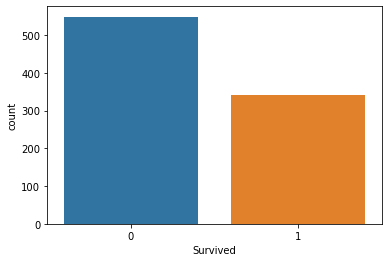

In [55]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived',data=df)

Count Plot of Survived. It shows that most of the Passengers did not survived.

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

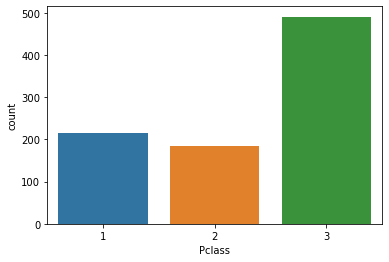

In [56]:
print(df['Pclass'].value_counts())
sns.countplot(x='Pclass',data=df)

This count plot shows that 3rd Class has the highest Passengers.

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

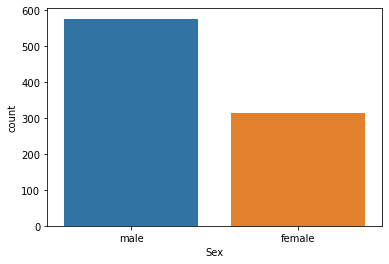

In [57]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df)

This count plot shows that there were more Male Passengers.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

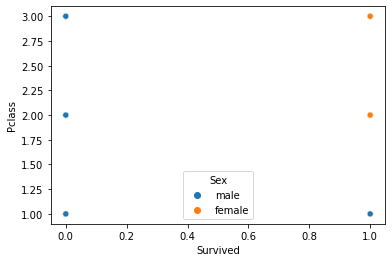

In [58]:
sns.scatterplot(x='Survived',y='Pclass',data=df,hue='Sex')

This shows that most of the Mle Passengers did not survive

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

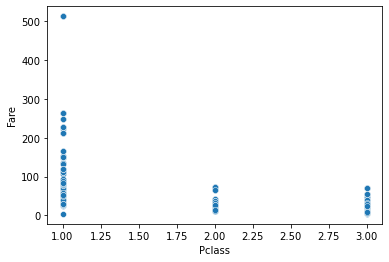

In [59]:
sns.scatterplot(x='Pclass',y='Fare',data=df)

This shows that 1st Class has more Fare.

<AxesSubplot:>

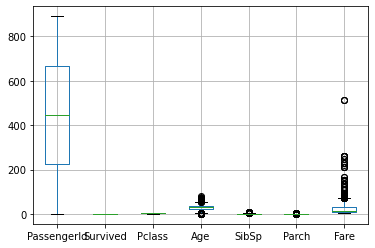

In [126]:
df.boxplot()

# Removing Outliers

In [100]:
df1=df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Reason to drop the column is.
Cabin -  It has high missing Value. 
Other Columns did not have impact on outcome

# Label Encoding Column 'Sex' and 'Embarked'

In [101]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
lenc=LabelEncoder()
df1.Sex=lenc.fit_transform(df.Sex)
df1.Embarked=lenc.fit_transform(df.Embarked)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Label Encoding Column 'Sex' and 'Embarked'

# Train, Test for x and y

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [149]:
x=df1.drop(['Survived'],axis=1)
print(x.shape)
y1=df1['Survived'].to_numpy()
y=pd.DataFrame(y1)
print(y.shape)

(891, 7)
(891, 1)


In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712, 1)
(179, 1)


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# 1. Logistic Regression

In [152]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,predlg)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,predlg))
print('Classification Report',classification_report(y_test,predlg))

Accuracy Report is 84.35754189944134 Percentage
Confusion Matrix 
 [[103  14]
 [ 14  48]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.77      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



# 2. Decision Tree Classifier

In [153]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,preddtc)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

Accuracy Report is 78.77094972067039 Percentage
Confusion Matrix 
 [[93 24]
 [14 48]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.79      0.83       117
           1       0.67      0.77      0.72        62

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.79      0.79       179



# 3. Support Vector Classifier (SVC)

In [154]:
svc=LinearSVC(random_state=0, tol=1e-5)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predsvc))
print('Confusion Matrix',confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

Accuracy Score 0.8268156424581006
Confusion Matrix [[102  15]
 [ 16  46]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.75      0.74      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [155]:
# 4. K-Neighbors Classifier

In [156]:
knn=KNeighborsClassifier(n_neighbors=500)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predknn))
print('Confusion Matrix','\n',confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.6536312849162011
Confusion Matrix 
 [[117   0]
 [ 62   0]]
Classification Report               precision    recall  f1-score   support

           0       0.65      1.00      0.79       117
           1       0.00      0.00      0.00        62

    accuracy                           0.65       179
   macro avg       0.33      0.50      0.40       179
weighted avg       0.43      0.65      0.52       179



# 5. Random Forest Classifier

In [157]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrfc))
print('Confusion Matrix','\n',confusion_matrix(y_test,predrfc))
print('Classification Report',classification_report(y_test,predrfc))

Accuracy Score 0.8435754189944135
Confusion Matrix 
 [[99 18]
 [10 52]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.85      0.88       117
           1       0.74      0.84      0.79        62

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.84      0.85       179



# 6. AdaBoost Classifier

In [158]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predad))
print('Confusion Matrix','\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))

Accuracy Score 0.8547486033519553
Confusion Matrix 
 [[102  15]
 [ 11  51]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.87      0.89       117
           1       0.77      0.82      0.80        62

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179



# 7. AUC ROC Curve

In [159]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [160]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print('AUC Score is',auc_score)

AUC Score is 0.8272677143644885


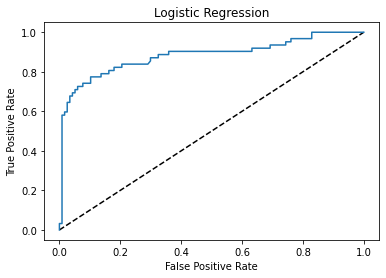

In [161]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistics Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

# Cross Validation Score

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
model=[lg,dtc,svc,knn,rfc,ad]
for i in model:
    score=cross_val_score(i,x,y,cv=10)
    print('Cross Val Score of',i,'=',score)
    print('Mean Score of',i,'=',score.mean())
    print('Accuracy Score of',i,'is',accuracy_score(y_test,i.predict(x_test))*100,'Percent')
    print('Difference of Accuracy in',i,'and Cross Val Score of',i,'is=',accuracy_score(y_test,i.predict(x_test))-score.mean())
    print('\n')

Cross Val Score of LogisticRegression() = [0.78888889 0.79775281 0.7752809  0.80898876 0.78651685 0.7752809
 0.78651685 0.78651685 0.80898876 0.85393258]
Mean Score of LogisticRegression() = 0.7968664169787766
Accuracy Score of LogisticRegression() is 84.35754189944134 Percent
Difference of Accuracy in LogisticRegression() and Cross Val Score of LogisticRegression() is= 0.04670900201563688


Cross Val Score of DecisionTreeClassifier() = [0.68888889 0.78651685 0.70786517 0.79775281 0.80898876 0.79775281
 0.80898876 0.74157303 0.82022472 0.78651685]
Mean Score of DecisionTreeClassifier() = 0.7745068664169787
Accuracy Score of DecisionTreeClassifier() is 78.77094972067039 Percent
Difference of Accuracy in DecisionTreeClassifier() and Cross Val Score of DecisionTreeClassifier() is= 0.013202630789725167


Cross Val Score of LinearSVC(random_state=0, tol=1e-05) = [0.71111111 0.74157303 0.64044944 0.71910112 0.75280899 0.71910112
 0.5505618  0.76404494 0.75280899 0.79775281]
Mean Score of Lin

# Conclusion

From The above we can see that AdaBoost Classifier have highAccuracy. Hence we use AdaBoost Classifier for building Model.

# Saving The File

In [164]:
import joblib

In [165]:
joblib.dump(ad,'bankad.org')

['bankad.org']

In [166]:
bankfile=joblib.load('bankad.org')
bankfile.predict(x_train)

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,